<a href="https://colab.research.google.com/github/Kriskan17/Berkeley_AIML/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google drive to load the data
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


##Introduction
The Breast Cancer Wisconsin (Original) dataset from UCI machine learning repository is a classification dataset, which records the measurements for breast cancer cases. The features in the dataset are computed from digitized images of a fine needle aspirate of a breast mass.They describe characteristics of the cell nuclei present in the image.

These features are used to determine whether a tissue sample is malignant or benign.

##Business Insight
In this project, the objective is to explore and investigate different factors that determine the Breast cancer diagnosis. The 30 features provided are charateristics of cell nuclei in tissue sample collected from patients. We aim to predict if a sample is Malignant(cancerous) or Benign (harmless),
despite the popular metric that is used in data science is 'Accuracy', we plan to use 'Recall' as the primary metric for this project. After reviewing
physician and expert advice on this topic it was concluded that avoiding 'False Negatives' is more important than the accuracy of the model. Not doing so, might mean potentially catastrophic consequences for the patient.

In [ ]:
#import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#read the input  file
df = pd.read_csv('/content/drive/My Drive/data/data.csv')


## Feature Exploration

---


This data set has 33 columns (features) and 569 rows. All the features are of the type float. There is an index column and an Unnamed column.

In [ ]:
# review the data and column names
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# review the object types and numbers of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Check the dataset for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are no null values except in the last column ' Unnamed: 32 ' . This column can be deleted along with the index column. The target feature 'diagnosis' is moved to out of the frame to enable charting and modelling.

In [ ]:
# move the target column out and drop columns that are not needed
y=df['diagnosis']
df.drop(['diagnosis','Unnamed: 32','id'],axis=1,inplace=True)


In [ ]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicate rows in this dataset

In [ ]:
#review statistical values for the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Review the statistics of the dataset , most of the features are distributed with some outliers. We are going to leave the outliers for now and comeback if it poses an issue.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

##Feature Visualization


---



After removing the unwanted columns and null values. We have a clean dataset with 569 rows and 30 features will all float64 data type values. Lets visualize the data now using different plots

B: 357
M: 212


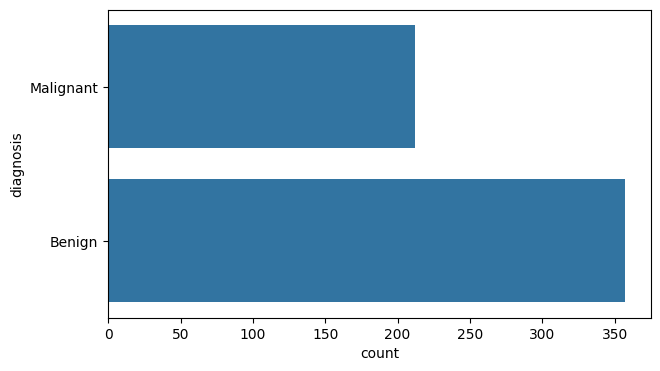

In [ ]:
#create a count plot to show the counts of the diagnostic column
axs = plt.subplots(1, figsize=(7, 4))
axs[1].set_yticklabels([ 'Malignant','Benign'])
sns.countplot(y)
B,M=y.value_counts()
print('B:',B)
print('M:',M)

The dataset has 357 benign and 212 malignant values in the target column

In [ ]:
# normalize the data using minmax scaler to review the distribution of the features
import pandas as pd
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
x_scaled= pd.DataFrame(x_scaled,index=df.index,columns=df.columns)

# Scaling

---


MinMaxScaler
rescales the data set such that all feature values are in the range [0, 1]. This will enable us to evaluate the correlation between the features.
x_scaled is the dataframe with scaled features

Lets visualize the data now, since there are 30 features - too many features to be represented in one plot. The data is being split in to three sets.

I picked swarm plot to review the data distribution as we do not have too may values in each feature and there are only two categories (benign or malignant).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

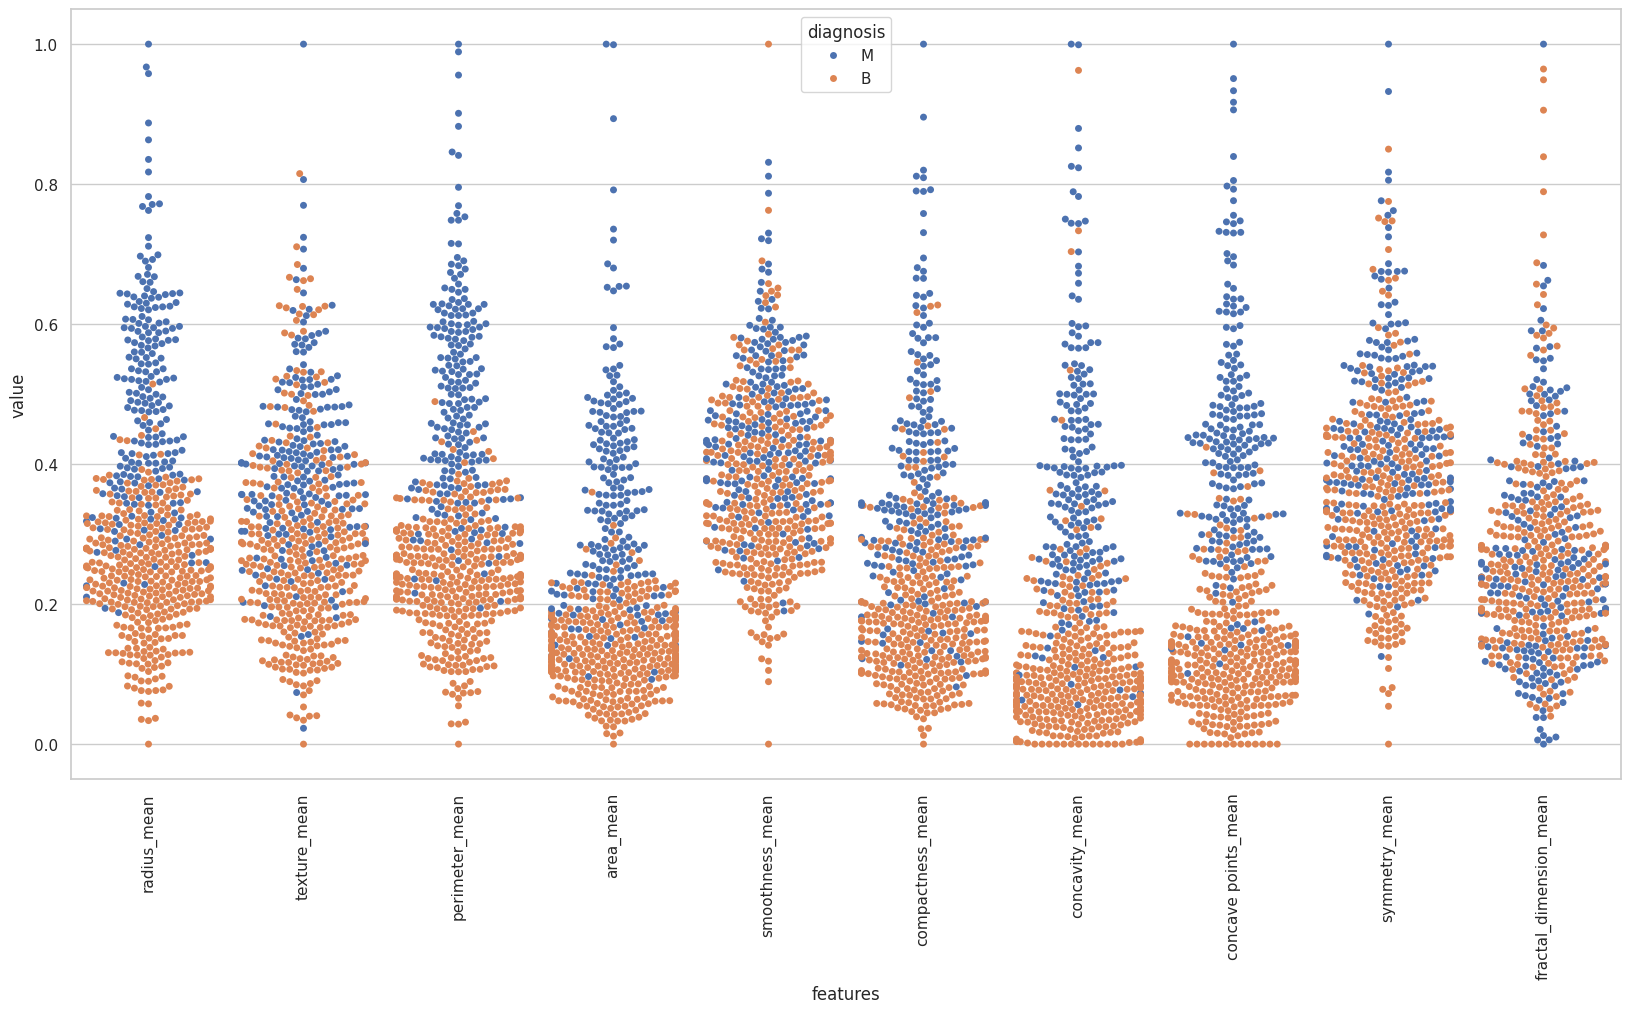

In [ ]:
sns.set(style="whitegrid")
#create a swarmplot to review the distribution of the first ten features
plt.figure(figsize=(20,10))
dfchart=pd.concat([y,x_scaled.iloc[:,0:10]],axis=1)
X1= pd.melt(dfchart,id_vars="diagnosis",var_name="features",value_name='value')
sns.swarmplot(data=X1,hue='diagnosis',x="features", y="value")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'texture_se'),
  Text(1, 0, 'perimeter_se'),
  Text(2, 0, 'area_se'),
  Text(3, 0, 'smoothness_se'),
  Text(4, 0, 'compactness_se'),
  Text(5, 0, 'concavity_se'),
  Text(6, 0, 'concave points_se'),
  Text(7, 0, 'symmetry_se'),
  Text(8, 0, 'fractal_dimension_se')])

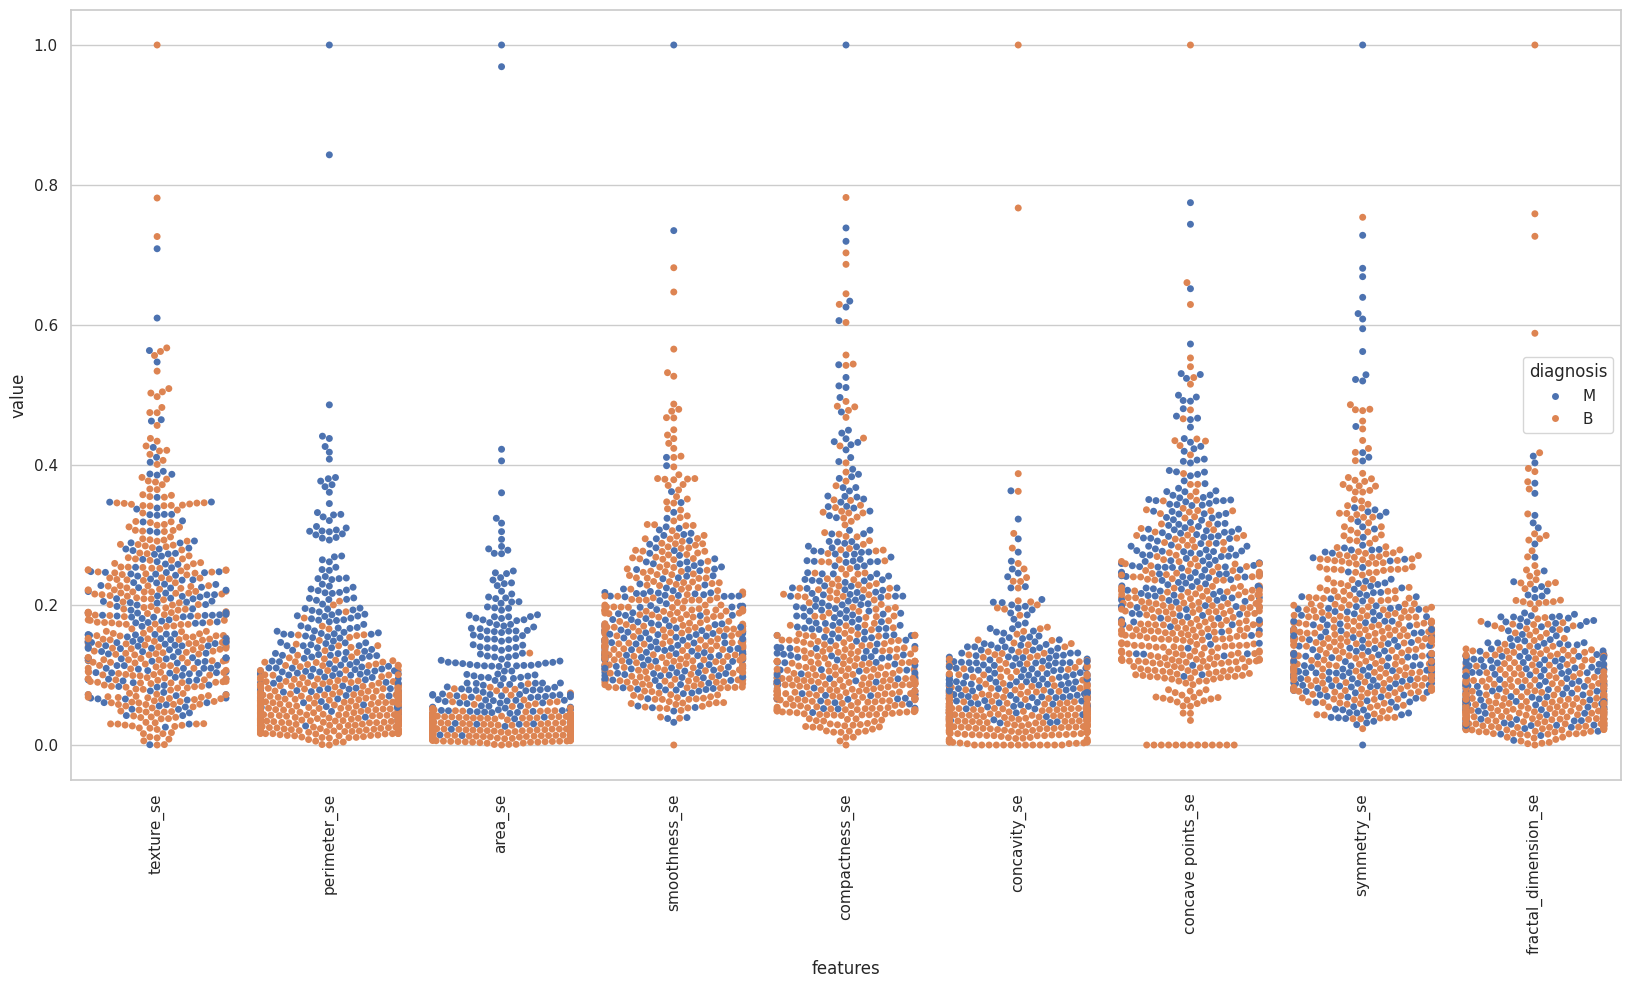

In [ ]:
#create a swarmplot to review the distribution of the second ten features
plt.figure(figsize=(20,10))
dfchart=pd.concat([y,x_scaled.iloc[:,11:20]],axis=1)
X1= pd.melt(dfchart,id_vars="diagnosis",var_name="features",value_name='value')
sns.swarmplot(data=X1,hue='diagnosis',x="features", y="value")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'texture_worst'),
  Text(1, 0, 'perimeter_worst'),
  Text(2, 0, 'area_worst'),
  Text(3, 0, 'smoothness_worst'),
  Text(4, 0, 'compactness_worst'),
  Text(5, 0, 'concavity_worst'),
  Text(6, 0, 'concave points_worst'),
  Text(7, 0, 'symmetry_worst'),
  Text(8, 0, 'fractal_dimension_worst')])

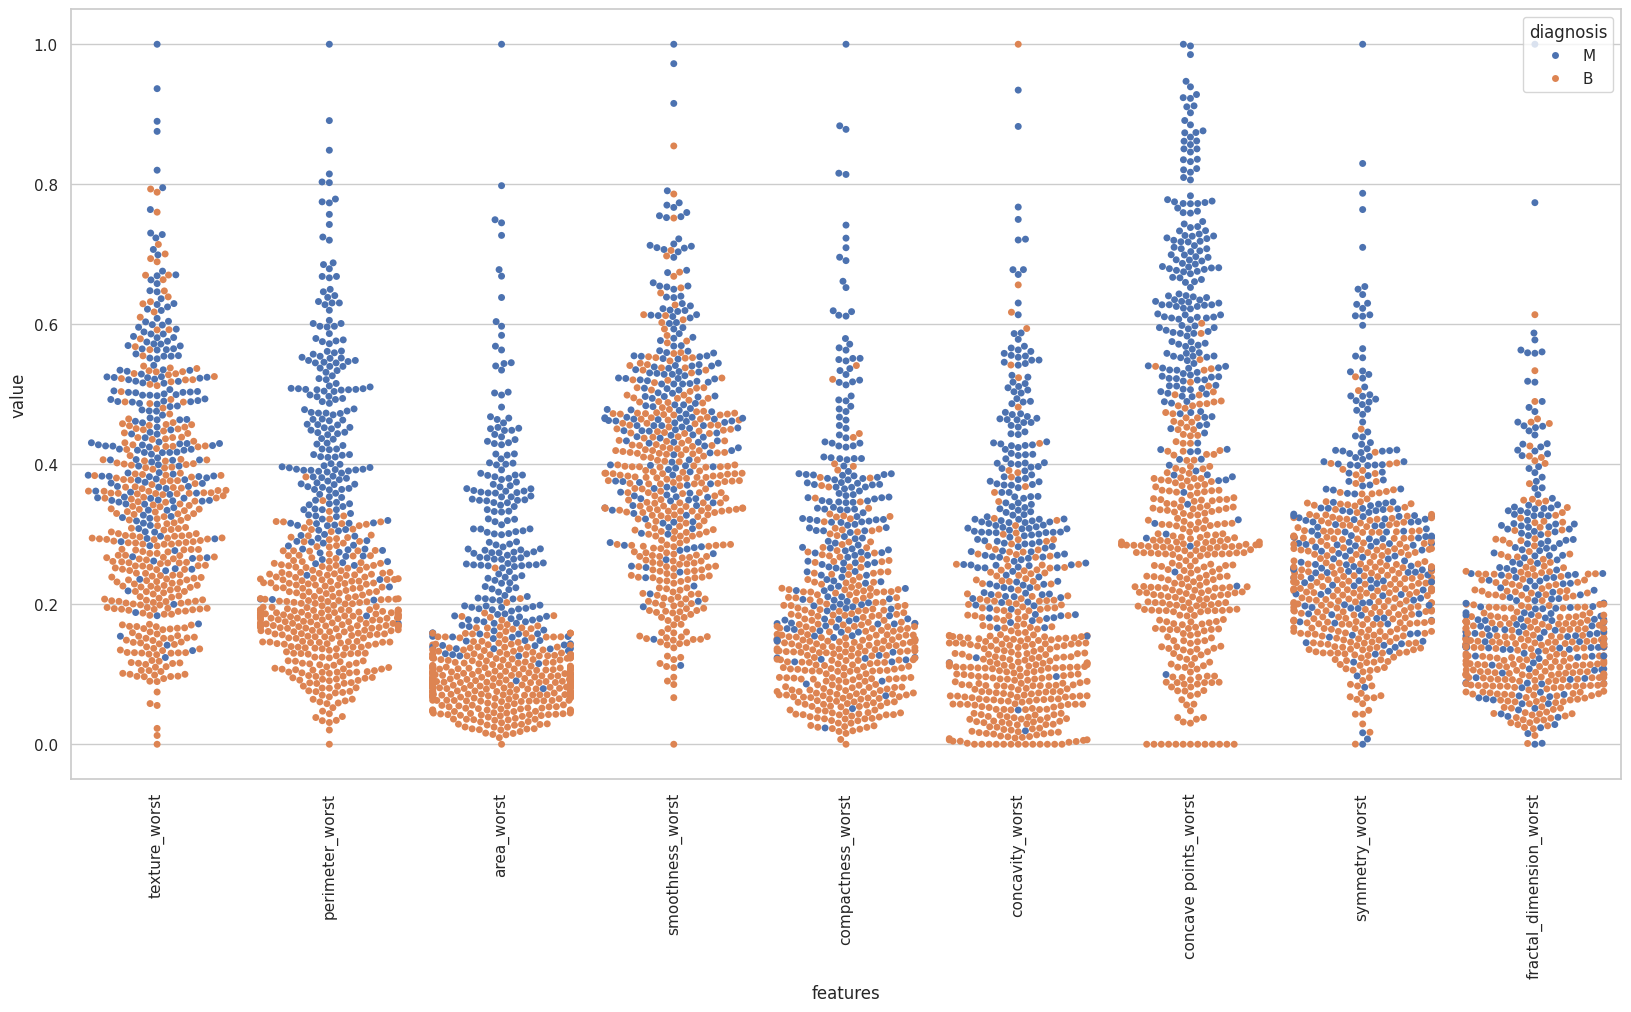

In [ ]:
#create a swarmplot to review the distribution of the third ten features
plt.figure(figsize=(20,10))
dfchart=pd.concat([y,x_scaled.iloc[:,21:30]],axis=1)
X1= pd.melt(dfchart,id_vars="diagnosis",var_name="features",value_name='value')
sns.swarmplot(data=X1,hue='diagnosis',x="features", y="value")
plt.xticks(rotation=90)

##Feature Engineering


---


We can deteremine after reviewing the 3 swarmplots that features
1.   fractal_dimension_worst (plot 3)
2.   symmetry_se
3.   texture_se
4.   Symmetry_worst
5.   fractal_dimension_mean
6.   Texture_worst

the two categorical values we need to classify are too  are too intermingled, these features will not be helpful in classifying the data.

The follwingfeatures show a clear seperation in the classes with a few exceptions
1. concave points_mean (plot 1)
2. area_worst (plot 3)
3. perimeter_worst (plot 3)

Lets further review these features using a heatmap before we drop them. A heatmap lets represent the data graphically using different colors with darker colors for high correlation squares.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 [Text(0.5, 0, 'radius_mean'),
  Text(1.5, 0, 'texture_mean'),
  Text(2.5, 0, 'perimeter_mean'),
  Text(3.5, 0, 'area_mean'),
  Text(4.5, 0, 'smoothness_mean'),
  Text(5.5, 0, 'compactness_mean'),
  Text(6.5, 0, 'concavity_mean'),
  Text(7.5, 0, 'concave points_mean'),
  Text(8.5, 0, 'symmetry_mean'),
  Text(9.5, 0, 'fractal_dimension_mean'),
  Text(10.5, 0, 'radius_se'),
  Text(11.5, 0, 'texture_se'),
  Text(12.5, 0, 'perimeter_se'),
  Text(13.5, 0, 'area_se'),
  Text(14.5, 0, 'smoothness_se'),
  Text(15.5, 0, 'compactness_se'),
  Text(16.5, 0, 'concavity_se'),
  Text(17.5, 0, 'concave points_se'),
  Text(18.5, 0, 'symmetry_se'),
  Text(19.5, 0, 'fractal_dimension_se'),
  Text(20.5, 0, 'radius_worst'),
  Text(21.5, 0, 'texture_worst'),
  Text(22.5, 0, 'perimeter_worst'),
  Text(23.5

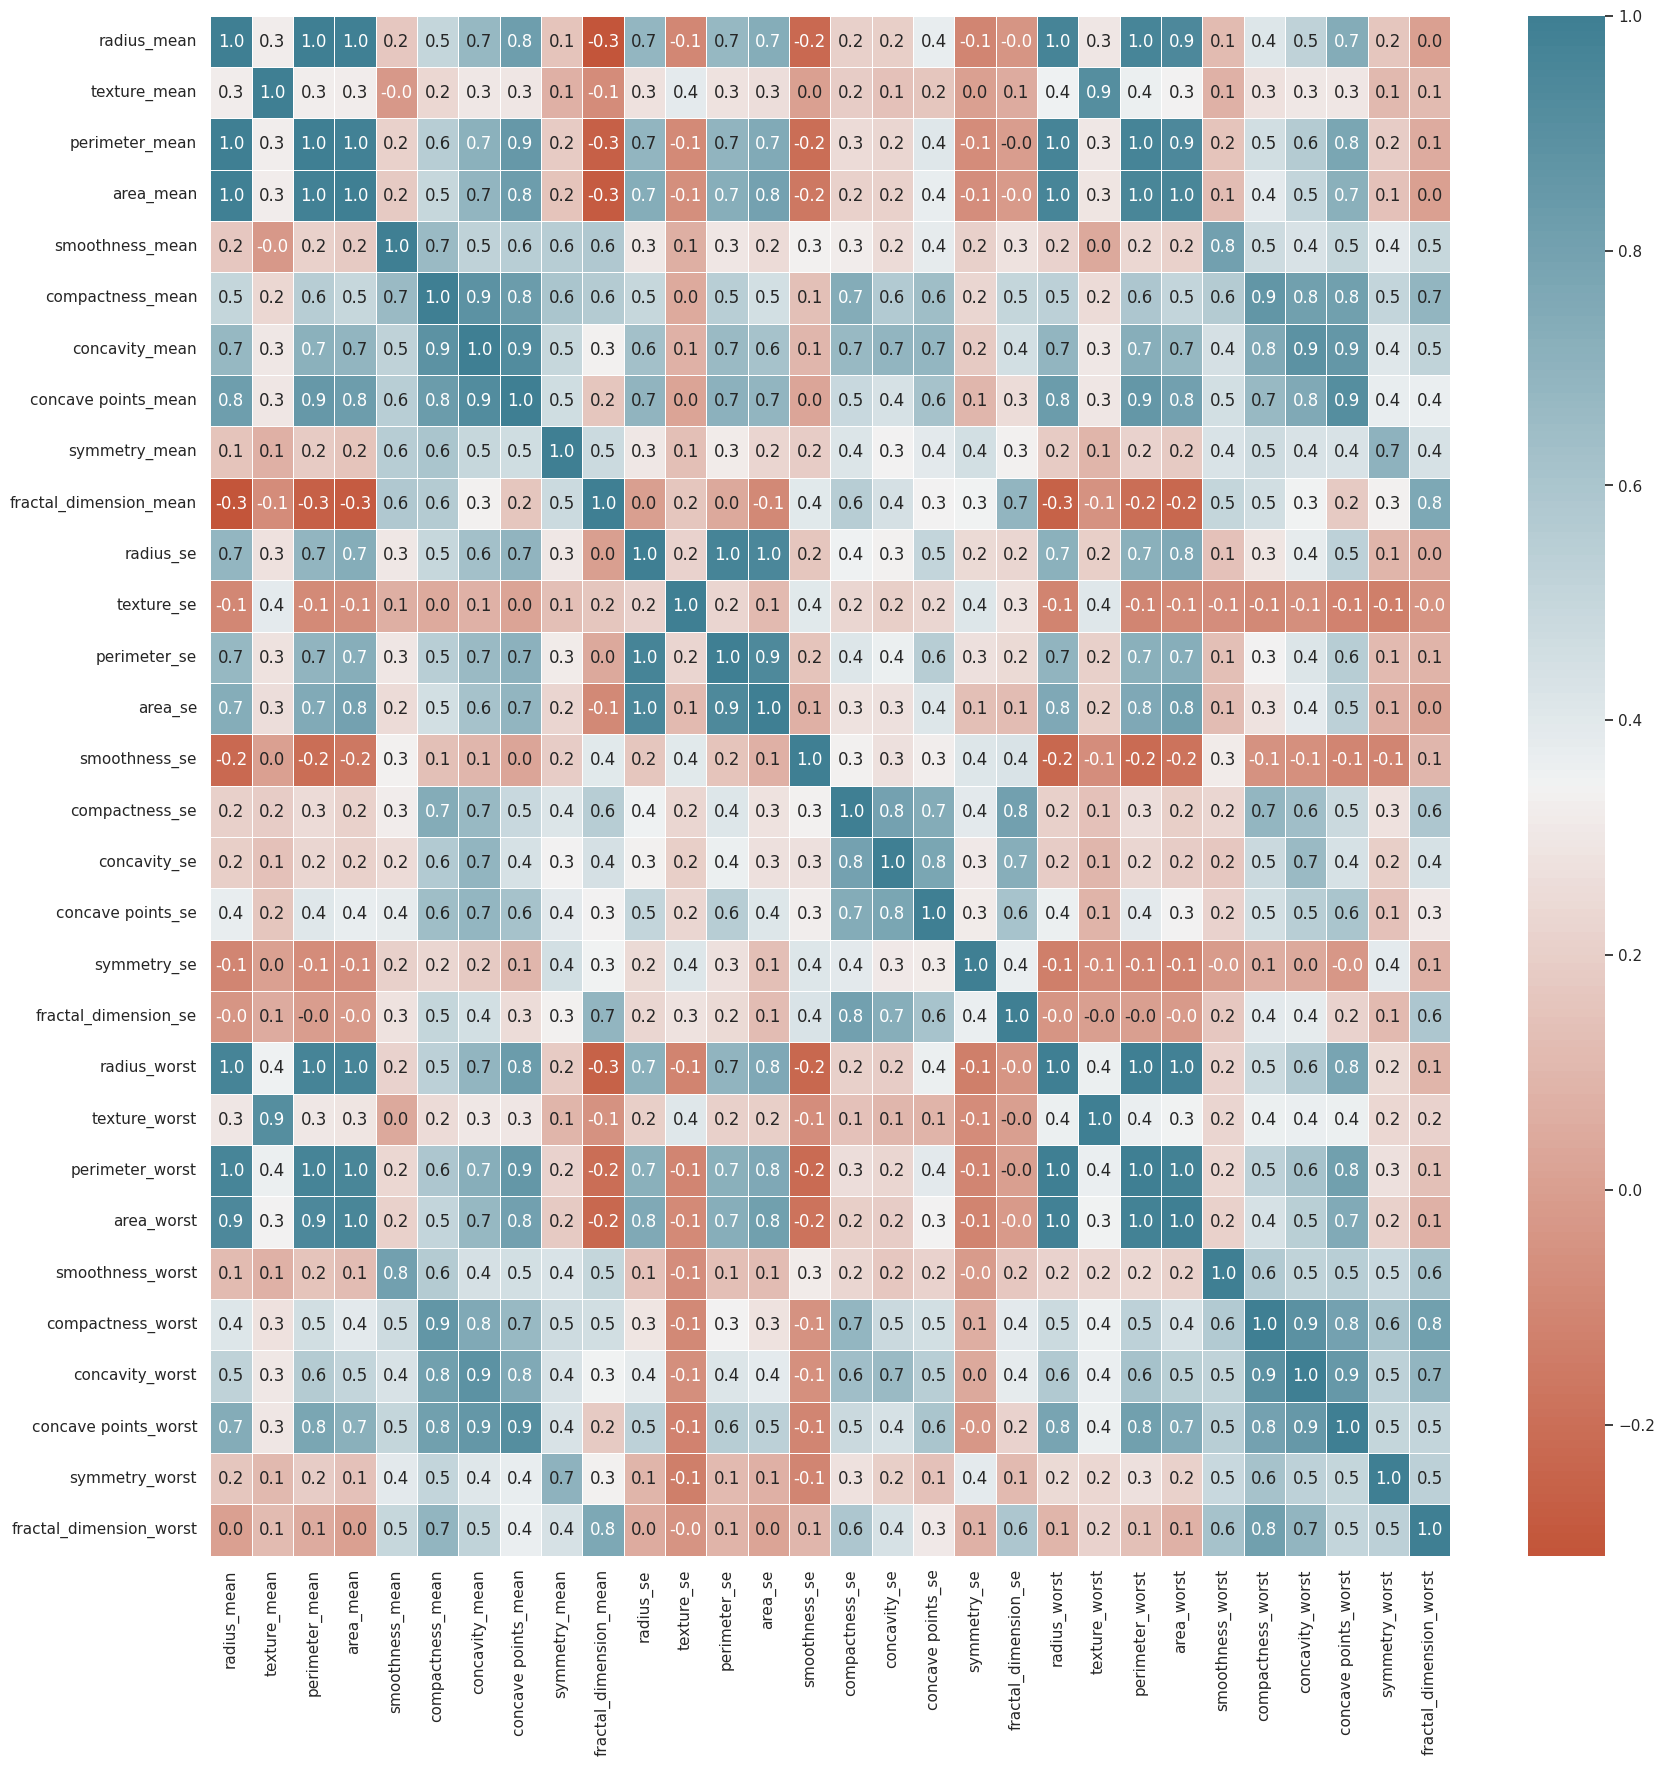

In [ ]:
#create a heatmap to review the correlation of features
plt.figure(figsize=(20,20))
sns.heatmap(x_scaled.corr(),annot=True,linewidths=.5, fmt= '.1f',cmap=sns.diverging_palette(20, 220, n=200))
plt.xticks(rotation=90)


* We can see that 'perimeter_mean','radius_mean', area_mean
are highly correlated. we will us only area_mean instead of all 3 values.

* Also radius_worst','perimeter_worst' , 'area_worst' are highly correlated,  lets drop radius_worst','perimeter_worst' and use only area_worst.

* compactness_mean','concave points_mean, concavity_mean are highly correlated. Lets use only concavity_mean.

* Similarly texture_worst is texture_mean are correlated. lets use texture_mean

* radius_se, perimeter_se and area_se are correlated - lets use area_ae and drop the other two.





In [ ]:
# drop the columns that have the high correlation (close to 1)
list1=['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','texture_worst','area_worst']
x_scaled = x_scaled.drop(list1,axis = 1 )
x_scaled.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.022658,0.363733,0.593753,0.703140,0.686364,0.605518,0.120469,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.601136,0.568610,0.598462,0.418864
1,0.272574,0.501591,0.289880,0.203608,0.379798,0.141323,0.082589,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.347553,0.192971,0.233590,0.222878
2,0.390260,0.449417,0.514309,0.462512,0.509596,0.211247,0.094303,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.483590,0.359744,0.403706,0.213433
3,0.360839,0.102906,0.811321,0.565604,0.776263,1.000000,0.175875,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.915472,0.548642,1.000000,0.773711
4,0.156578,0.489290,0.430351,0.463918,0.378283,0.186816,0.093065,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.437364,0.319489,0.157500,0.142595


Lets visualize the heatmap after the features are dropped. we still see a few correlation values that are as high as '0.9'. Leave these values in the dataframe for now - we can revisit if it becomes an issue.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'texture_mean'),
  Text(1.5, 0, 'area_mean'),
  Text(2.5, 0, 'smoothness_mean'),
  Text(3.5, 0, 'concavity_mean'),
  Text(4.5, 0, 'symmetry_mean'),
  Text(5.5, 0, 'fractal_dimension_mean'),
  Text(6.5, 0, 'texture_se'),
  Text(7.5, 0, 'area_se'),
  Text(8.5, 0, 'smoothness_se'),
  Text(9.5, 0, 'compactness_se'),
  Text(10.5, 0, 'concavity_se'),
  Text(11.5, 0, 'concave points_se'),
  Text(12.5, 0, 'symmetry_se'),
  Text(13.5, 0, 'fractal_dimension_se'),
  Text(14.5, 0, 'smoothness_worst'),
  Text(15.5, 0, 'concavity_worst'),
  Text(16.5, 0, 'symmetry_worst'),
  Text(17.5, 0, 'fractal_dimension_worst')])

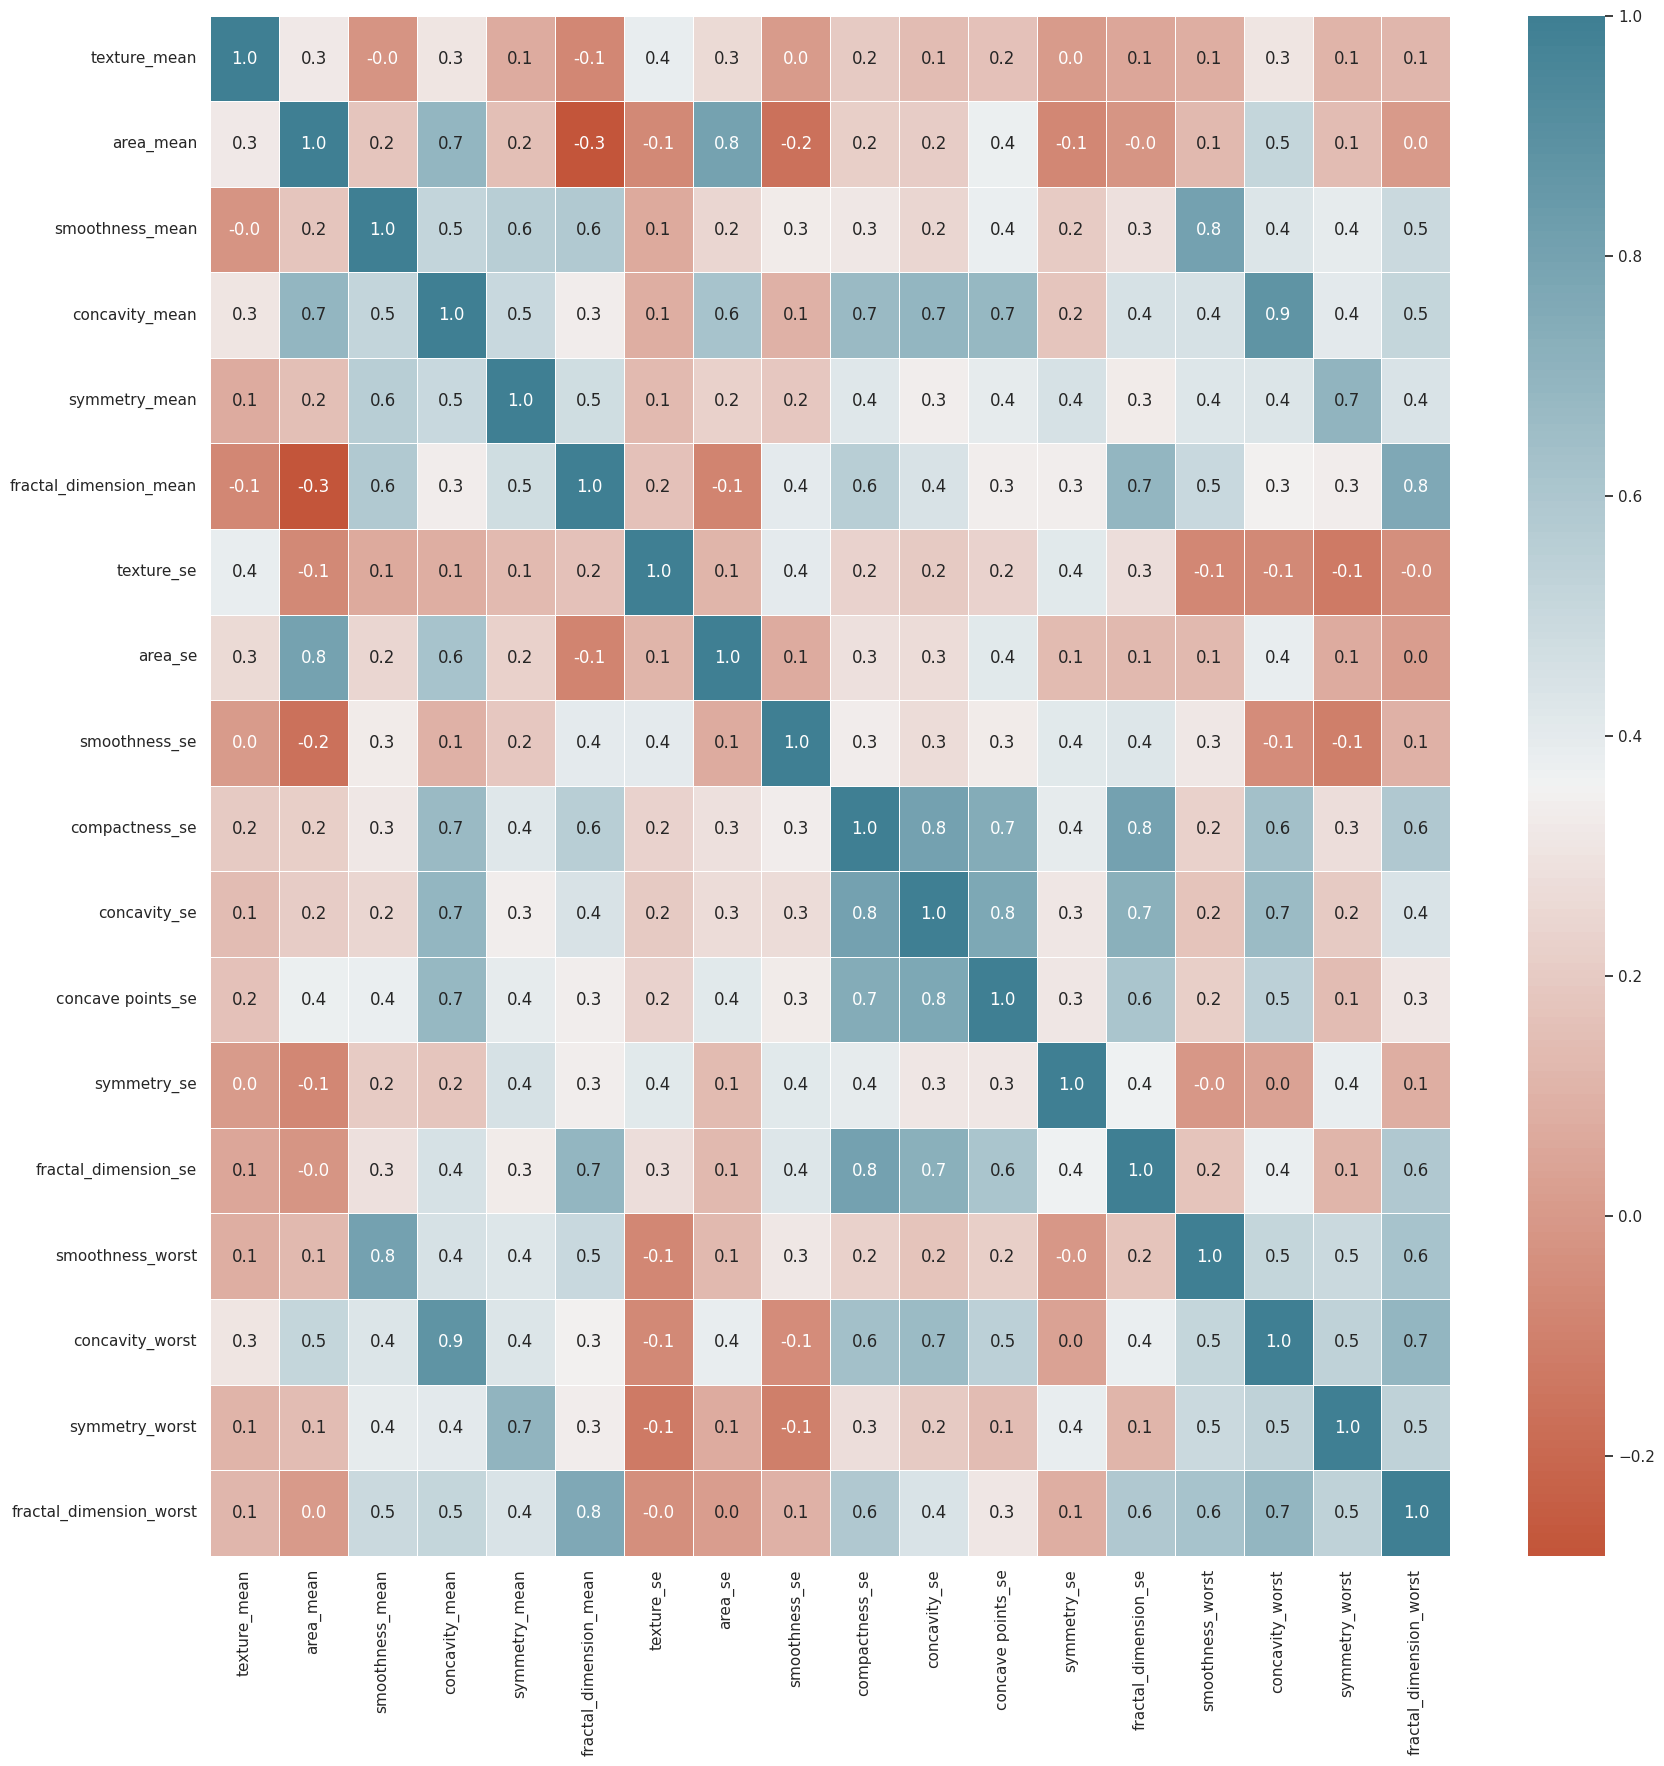

In [ ]:
#create a heatmap to review the correlation of features after dropping the columns
plt.figure(figsize=(20,20))
sns.heatmap(x_scaled.corr(),annot=True,linewidths=.5, fmt= '.1f',cmap=sns.diverging_palette(20, 220, n=200))
plt.xticks(rotation=90)

## Feature Importance


---



To further filter some of the features lets visualize the feature importances by using a random forest model. This will let us use the forest of trees to evaluate the importance of the features in a classification task.

Accuracy is:  0.9590643274853801


<Axes: >

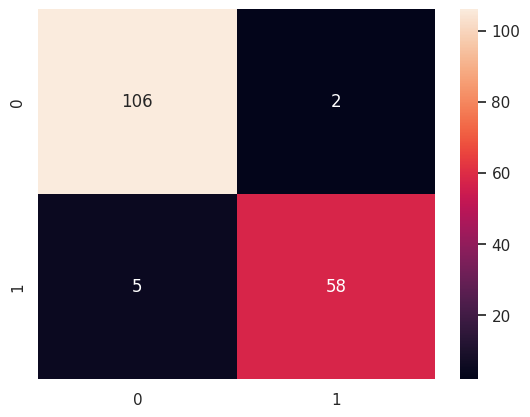

In [ ]:
# Use Randomforestclassifier to chart the feature importance
#Change Target series strings to numbers
y=y.replace({'B':0,'M':1})

model_rf=RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

model_rf= RandomForestClassifier(random_state=40)
model_rf=model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)
auc_score = accuracy_score(y_test,y_pred)

print('Accuracy is: ',auc_score)
# Create a confusion matrix
con_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(con_matrix,annot=True,fmt="d")





Calculate the accuracy score of the model to review the feature importances

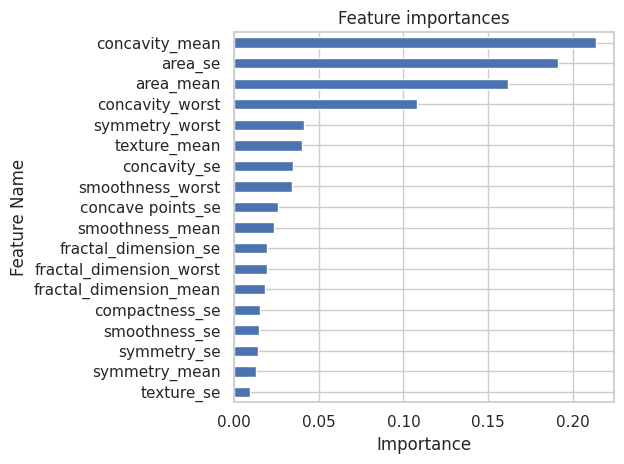

In [ ]:
#plot the feature importances
importances=model_rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=True, inplace=True)
fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Feature Name")
ax.set_xlabel("Importance")
fig.tight_layout()


We can see by the length of the blue bar that the feature is more important in the classification task. We can drop the features at the bottom of the chart as their importance is low.

In [ ]:
# drop the columns that have less feature importance
list2=['smoothness_mean','symmetry_mean','fractal_dimension_mean','texture_se','smoothness_se','compactness_se','symmetry_se','fractal_dimension_se','smoothness_worst','fractal_dimension_worst']
x_scaled = x_scaled.drop(list2,axis = 1)
x_scaled.head()


,texture_mean,area_mean,concavity_mean,area_se,concavity_se,concave points_se,concavity_worst,symmetry_worst
0,0.022658,0.363733,0.703140,0.273811,0.135682,0.300625,0.568610,0.598462
1,0.272574,0.501591,0.203608,0.125660,0.046970,0.253836,0.192971,0.233590
2,0.390260,0.449417,0.462512,0.162922,0.096768,0.389847,0.359744,0.403706
3,0.360839,0.102906,0.565604,0.038155,0.142955,0.353665,0.548642,1.000000
4,0.156578,0.489290,0.463918,0.163688,0.143636,0.357075,0.319489,0.157500


Now we have the final set of features that we will use to build our models. Let split the data in to training and testing sets (70/30 split)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

#Cross validation
A family of methods to validate a model using only the existing data from the model; these techniques include K-fold cross-validation, leave-one-out cross-validation, and others
#K-fold
Lets use K-fold cross validation to split the data 10 different sets to be used for training and testing. In K-fold validation , A specific type of cross-validation where the number of ‘folds’ is selected, and one ‘fold’ becomes the test set, while all other ‘folds’ become the training set
#Shuffle
Shuffling the data helps us mitigate any unbalanced data - shuffle=True

LR: 0.919808 (0.039817)
KNN: 0.929872 (0.039938)
TREE: 0.884679 (0.055842)
RTREE: 0.944872 (0.038391)
NB: 0.929808 (0.039866)
SVM: 0.957372 (0.033568)
XGB: 0.929808 (0.056695)


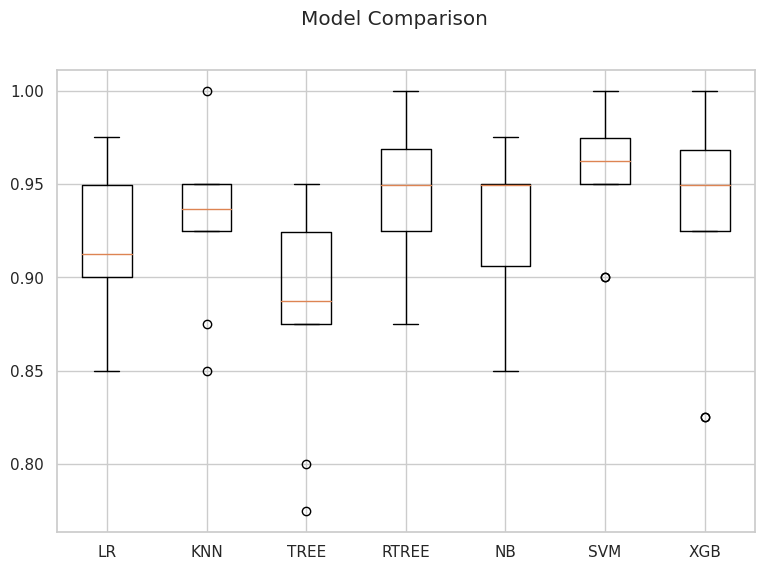

In [ ]:
# Cross validate using 10 K-fold technique to compare the accuracy of multiple models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('RTREE', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))
models.append(('XGB',XGBClassifier()))

results_cv = []
names_cv = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=42,shuffle=True)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_cv.append(cv_results)
    names_cv.append(name)
    auc_score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(auc_score)

    # Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_cv)

fig.suptitle('Model Comparison')
ax.set_xticklabels(names_cv)
plt.show()

The above plot shows the mean and standard deviation of the accuracy of the following models

* LogisticRegression  - Logistic Regression (aka logit, MaxEnt) classifier.

* KNeighborsClassifier - Classifier implementing the k-nearest neighbors vote.

* RandomForestClassifier -A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing splitter="best" to the underlying DecisionTreeRegressor. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

* GaussianNB  - Gaussian Naive Bayes (GaussianNB) Classifier
* SVC  - C-Support Vector Classification.
* XGBClassifier - XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable

## Base Model and Hyperparmeter Tuning:
## Grid Search
The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the optimization_dict parameter



In [ ]:
# Grid search over specified parameter values for an estimator(xgb).
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200]}
model = GridSearchCV(xgb_model, optimization_dict,
                     scoring='accuracy', verbose=1)
model.fit(X_train,y_train)
print(model.best_score_)
print(model.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.9447151898734176
{'max_depth': 2, 'n_estimators': 100}


Gridsearch recommends max_depth=2 with 100 estimators for XGB

Lets also try one of the other models again KNN using grid search cv.





In [ ]:
# Grid search parameters for KNN optimizer
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range,weights=weight_options)
model_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
model_knn.fit(X_train,y_train)
print(model_knn.best_score_)
print(model_knn.best_params_)


0.9371794871794872
{'n_neighbors': 11, 'weights': 'uniform'}


Grid search is recommending 11 neighbors and uniform weights for KNN model

Accuracy is:  0.9473684210526315
Precision is:  0.921875
F1 is:  0.9291338582677166
Recall is:  0.9365079365079365


<Axes: >

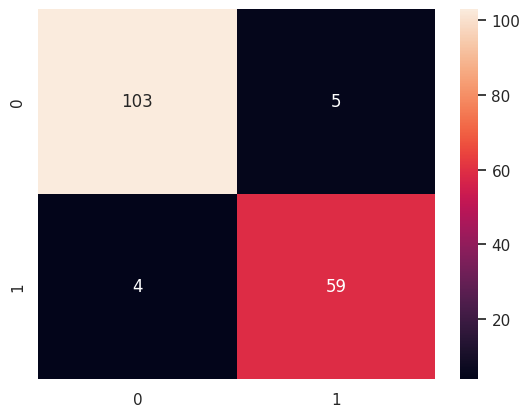

In [ ]:
# Fit a KNN model to compare the metrics
model_knn=KNeighborsClassifier(n_neighbors=11,weights='uniform')
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
prec_knn=metrics.precision_score(y_test, y_pred_knn)
f1_knn=f1_score(y_test, y_pred_knn)
recall_knn=metrics.recall_score(y_test, y_pred_knn)
auc_score_knn=accuracy_score(y_test, y_pred_knn)
print('Accuracy is: ',auc_score_knn)
print('Precision is: ',prec_knn)
print('F1 is: ',f1_knn)
print('Recall is: ',recall_knn)
# Create a confusion matrix
con_matrix = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(con_matrix,annot=True,fmt="d")

## Manual Hyper parameter tuning:
After using the parameters recommended by gridsearchcv on XGB and KNN- we found that XGB has higher recall. Now that we have a base for the parameters found by gridsearchCV - We can further tune the various parameters for XGB model to increase the accuracy of the model - Manually (recall is the primary metric)

Accuracy is:  0.9766081871345029
Recall is:  0.9682539682539683
Precision is:  0.9682539682539683
F1 is:  0.9682539682539683


<Axes: >

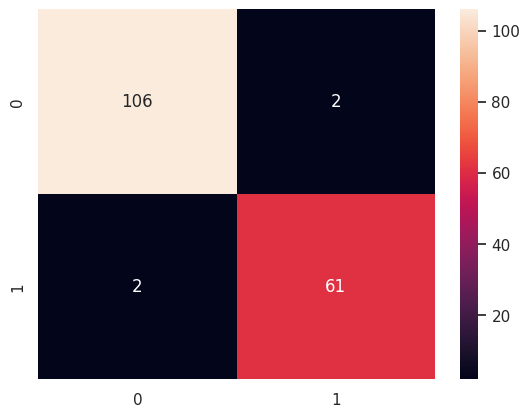

In [ ]:
# Manual tuning based on https://xgboost.readthedocs.io/en/stable/parameter.html
model_xgb = XGBClassifier(learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
auc_score_xgb=accuracy_score(y_test, y_pred_xgb)
print('Accuracy is: ',auc_score_xgb)
prec_xgb=metrics.precision_score(y_test, y_pred_xgb)
f1_xgb=f1_score(y_test, y_pred_xgb)
recall_xgb=metrics.recall_score(y_test, y_pred_xgb)
accuracy_score(y_test, y_pred_xgb)
print('Recall is: ',recall_xgb)
print('Precision is: ',prec_xgb)
print('F1 is: ',f1_xgb)
# Create a confusion matrix
con_matrix = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(con_matrix,annot=True,fmt="d")

We can see that the accuracy of the model increased by a 3 points after further tuning the parameters.

## Findings:

In this project the Wisconsin Breast Cancer Database was analysed. After appropriate data processing, feature selection and classification.
We used several following models

* LogisticRegression - Logistic Regression (aka logit, MaxEnt) classifier.

* KNeighborsClassifier - Classifier implementing the k-nearest neighbors vote.

* RandomForestClassifier -A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing splitter="best" to the underlying DecisionTreeRegressor. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

* GaussianNB - Gaussian Naive Bayes (GaussianNB) Classifier

* SVC - C-Support Vector Classification.

* XGBClassifier - XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable

Among the models used Randomtree classifier ,KNN and XGB models have higher accuracy. In addition to the comparision to other models, hyper parameter tuning was performed to increase the accuracy of the models. The GradientBoost Model had the highest accuracy on the given Wisconsin Diagnostic Breast Cancer dataset after performing a combination of automated and manual tuning of hyper parameters.

## Next steps
Based on further research online in the article listed below , The authors found that Multiplayer perceptron Model on the WDBC dataset obtained higher accuracy than XGB model. This is something that can be pursued as future work for this project.

Aamir S, Rahim A, Aamir Z, Abbasi SF, Khan MS, Alhaisoni M, Khan MA, Khan K, Ahmad J. Predicting Breast Cancer Leveraging Supervised Machine Learning Techniques. Comput Math Methods Med. 2022 Aug 16;2022:5869529. doi: 10.1155/2022/5869529. PMID: 36017156; PMCID: PMC9398810.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9398810/